# Example code for Curve.py
The goal of this notebook is to give instructive examples on how to use the different functions of the Curve class.

In [2]:
from Curve import Curve
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

## Instantiation

In [2]:
## 1st method: hand over two 1D lists, one with the x values, the other with the y values of the data points
x = np.linspace(1,10,10) # generate some x data points
y = 2*x # y data

# note: all arguments are optional
c1 = Curve(x,y, #  pass data from two lists of same size
        title="Test curve - title",
        x_label="x-axis", x_unit = "x unit",
        y_label="y-axis",
        plot_args={'color':'red'}) # arguments passed to pyplot.plot

## 2nd method: hand over one list of (x,y) tuples
points = np.array([ [1,3], [2,5], [3,2] ])
c2 = Curve(xy=points)

## Plotting

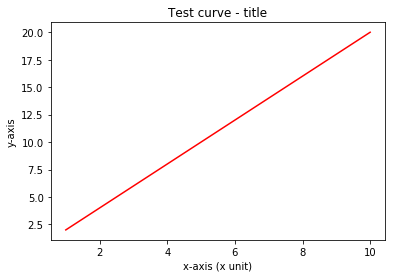

In [3]:
# quick plotting of a single curve
c1.plot_standalone()

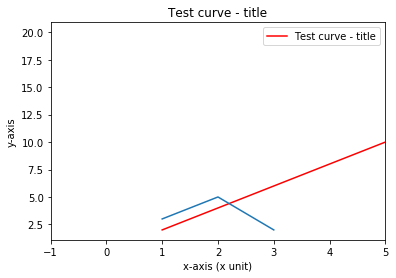

In [4]:
# more elaborate plots with more user control
fig, ax = plt.subplots()
c1.setup_plot(ax) # use the properties of c1 to setup axes labels etc.
c1.plot(ax) # plot c1
c2.plot(ax) # plot c2
# change any other settings of the axis as you wish
ax.set_xlim(-1,5)
plt.legend()
plt.show()


## Basic data manipulation

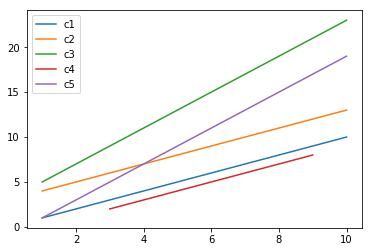

In [5]:
x = np.linspace(1,10,10)

# add
c1 = Curve(x,x)
c2 = c1 + 3 # using scalars
c3 = c2+c1 # using other curves

x2 = np.linspace(3,9,20) 
c4 = Curve(x2,x2-1) 
c5 = c1 + c4 # using other curves defined at other data points (would be a pain using numpy!)

# let's plot this
fig, ax = plt.subplots()
c1.plot(ax,plot_args={'label':'c1'})
c2.plot(ax,plot_args={'label':'c2'})
c3.plot(ax,plot_args={'label':'c3'})
c4.plot(ax,plot_args={'label':'c4'})
c5.plot(ax,plot_args={'label':'c5'})
plt.legend()
plt.show()

Note that c5 is defined on the x-range of the first curve (c1).
c4 is extrapolated for values outside its x-range.

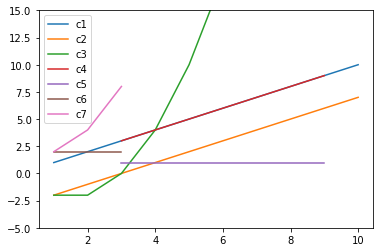

In [6]:
# subtraction, multiplication, division and power are used in the same way
x = np.linspace(1,10,10)

c1 = Curve(x,x)
c2 = c1 - 3 
c3 = c1 * c2

x2 = np.linspace(3,9,20) 
c4 = Curve(x2,x2) 
c5 = c4 / c1 # using other curves defined at other data points (would be a pain using numpy!)
c6 = Curve([1,2,3],[2,2,2])
c7 = c6**c1

# let's plot this
fig, ax = plt.subplots()
c1.plot(ax,plot_args={'label':'c1'})
c2.plot(ax,plot_args={'label':'c2'})
c3.plot(ax,plot_args={'label':'c3'})
c4.plot(ax,plot_args={'label':'c4'})
c5.plot(ax,plot_args={'label':'c5'})
c6.plot(ax,plot_args={'label':'c6'})
c7.plot(ax,plot_args={'label':'c7'})
ax.set_ylim(-5,15)
plt.legend()
plt.show()

### get back data for further custom treatment

In [7]:
x = np.linspace(1,10,10)
c1 = Curve(x,2*x)

# get x
c1.get_x()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [8]:
# get x within a certain range
c1.get_x(x_range=(None,5.5)) # all values smaller or equal to 5.5

array([1., 2., 3., 4., 5.])

In [9]:
# get y - analoguously
c1.get_y(x_range=(None,5.5)) # all values for which x is smaller or equal to 5.5

array([ 2.,  4.,  6.,  8., 10.])

In [10]:
# get x and y at the same time
x,y = c1.get_x_y(x_range=(2,5.5))
print(f'x: {x}')
print(f'y: {y}')

x: [2. 3. 4. 5.]
y: [ 4.  6.  8. 10.]


In [11]:
# get a list of tuples
c1.get_xy(x_range=(2,5,5))

array([[ 2.,  4.],
       [ 3.,  6.],
       [ 4.,  8.],
       [ 5., 10.]])

## More elaborate data manipulation

### Crop



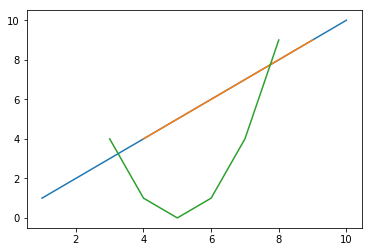

In [12]:
x = np.linspace(1,10,10)
c1 = Curve(x,x)
c2 = c1.cropped((3.5,9)) # c2 is a cropped copy of c1 -> c1 is unchanged; note: c2 holds all points in the range [3.5,9], however the first point in this range is at x=4
c3 = Curve(x,(x-5)**2)
c3.crop((3,8)) # crop actually changes the curve it is applied on

fig, ax = plt.subplots()
c1.plot(ax)
c2.plot(ax)
c3.plot(ax)
plt.show()

### Append one curve to another

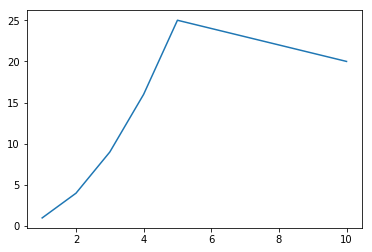

In [13]:
x1 = np.linspace(1,5,5)
c1 = Curve(x1,x1**2)
x2 = np.linspace(7,10,4)
c2 = Curve(x2,-x2+30)
c3 = c1.append(c2)
c3.plot_standalone()

### Evaluate using interpolation
All numeric curves are defined on a finite number of points. To get the curves value in between, we can use interpolation.


In [14]:
x = np.linspace(1,10,10)
c1 = Curve(x,x**2)  # parabola

print(f'c1(3): {c1.evaluate(3)}') # evaluate on a single point
print(f'c1(1.5): {c1.evaluate(1.5)}') # evaluate on a single point using interpolation. Default is cubic spline interpolation
print(f'c1([1.5,2.5]): {c1.evaluate([1.5,2.5])}') # evaluate on a list of points
print(f'c1(1.5, linear interpol): {c1.evaluate(1.5,interpolation="spline",interpolation_args={"k":1})}') # evaluate using linear interpolation
print(f'c1(1.5, previous): {c1.evaluate(1.5,interpolation="previous")}')# evaluate using previous interpolation
print(f'c1(1.5, next): {c1.evaluate(1.5,interpolation="next")}')# evaluate using next interpolation
print(f'c1(1.2, nearest): {c1.evaluate(1.2,interpolation="nearest")}')# evaluate using nearest interpolation
print(f'c1(1.7, nearest): {c1.evaluate(1.7,interpolation="nearest")}')# evaluate using nearest interpolation

c1(3): 9.000000000000002
c1(1.5): 2.250000000000001
c1([1.5,2.5]): [2.25 6.25]
c1(1.5, linear interpol): 2.5
c1(1.5, previous): 1.0
c1(1.5, next): 4.0
c1(1.2, nearest): 1.0
c1(1.7, nearest): 4.0


### Delete points
that fulfill a user defined condition


In [15]:
x = np.linspace(1,10,10)
c1 = Curve(x,x**2)
c2 = c1.remove_data_points(lambda x,y: x>5)
print(f"c1 - x {c1.get_x()}") # note c1 got changed as well 
print(f"c1 - y {c1.get_y()}")
print(f"c2 - x {c2.get_x()}")

c1 - x [1. 2. 3. 4. 5.]
c1 - y [ 1.  4.  9. 16. 25.]
c2 - x [1. 2. 3. 4. 5.]


In [16]:
c3 = Curve(x,x)
c3.remove_data_points(lambda x,y: np.logical_and(y>2,x<=7))
print(f"c3 - x {c3.get_x()}")
print(f"c3 - y {c3.get_y()}")

c3 - x [ 1.  2.  8.  9. 10.]
c3 - y [ 1.  2.  8.  9. 10.]


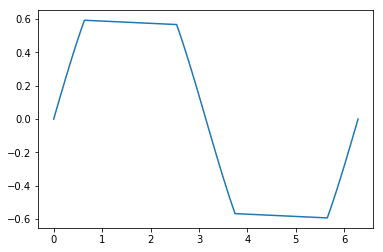

In [17]:
# a graphical example -  delete all values of a sin for which abs(sin(x)) > 0.6
x = np.linspace(0,2*np.pi,100)
c4 = Curve(x,np.sin(x))
c4.remove_data_points(lambda x,y: np.abs(y)>0.6)
c4.plot_standalone()

### Arbitrary transformation
of the data

In [18]:
x = np.array([1,10,100,1000])
y = np.array([0,1,2,3])
c1 = Curve(x,y)
# classic use: go from log to linear scaling
c2 = c1.apply_transformation(lambda x,y: (np.log10(x),y))
print(f"c2 - x {c2.get_x()}")
print(f"c2 - y {c2.get_y()}")

c2 - x [0. 1. 2. 3.]
c2 - y [0 1 2 3]


Another common example: applying a calibration.
Let's say we measure a quantity y as function of Temperature using a resistive thermometer. The thermometer reading however is a resistance, so that we actually measure y(R). We are interested in y(T) and know the thermometer calibration T(R). 


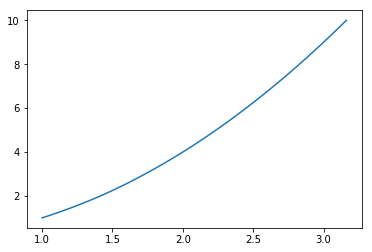

In [19]:
y_R = Curve(np.linspace(100,110,100),np.linspace(1,10,100))  # y(R) measured
T_R = Curve(np.linspace(100,110,10),np.sqrt(np.linspace(1,10,10))) # T(R) calibration

y_T = deepcopy(y_R) # if we want to reuse y(R) at some later point, we should work on a copy of the data. otherwise it will be overwritten
y_T.apply_transformation(lambda x,y: (T_R.evaluate(x),y)) # calculate y(T)

y_T.plot_standalone()

### Smoothing data
very important for experimental data which is often noisy
The smoothed / smoothen implement several smoothing techniques:
moving average, Gaussian, Savitzky-Golay and lowess.

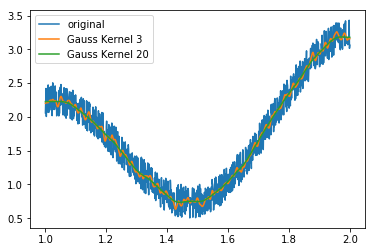

In [20]:
x = np.linspace(1,2,1000) 
y = np.cos(2*np.pi*x) + x + np.random.rand(1000)*0.5

fig, ax = plt.subplots()
c = Curve(x,y)
c.plot(ax,plot_args={'label':'original'})

gauss_kernelsize1 = 3
gauss_order = 0
c1 = c.smoothed("Gauss",filtering_parameter=[gauss_kernelsize1,gauss_order])
c1.plot(ax,plot_args={'label':'Gauss Kernel 3'})

gauss_kernelsize2 = 20
gauss_order = 0
c2 = c.smoothed("Gauss",filtering_parameter=[gauss_kernelsize2,gauss_order])
c2.plot(ax,plot_args={'label':'Gauss Kernel 20'})

plt.legend()
plt.show()

## Data analysis tools

### Find points where curve takes a certain value


pts2: [3.41796875 6.58203125]
pts3: [3.50390625 6.50390625]


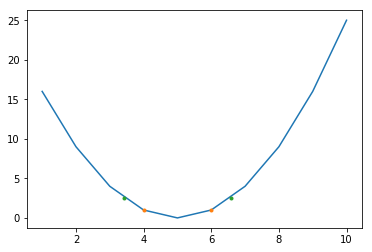

In [21]:
x = np.linspace(1,10,10)
y = (x-5)**2
c1 = Curve(x,y)
pts1 = c1.where(1)
pts2 = c1.where(2.5) #  by default: use cubic spline interpolation
pts3 = c1.where(2.5,interpolation_args={'k':1}) # use linear interpolation
print(f'pts2: {pts2}')
print(f'pts3: {pts3}')

fig, ax = plt.subplots()
c1.plot(ax)
ax.plot(pts1,c1.evaluate(pts1),ls='',marker='.')
ax.plot(pts2,c1.evaluate(pts2),ls='',marker='.')
plt.show()

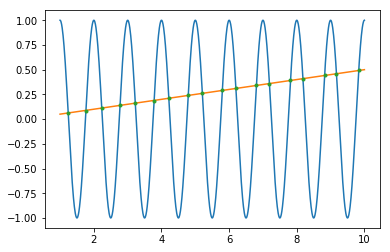

In [22]:
# other application: find intersection points of 2 curves
x = np.linspace(1,10,1000)
c1 = Curve(x,np.cos(2*np.pi*x))
c2 = Curve(x,0.05*x)
c3 = c1-c2
intersection = c3.where(0,x_precision=0.001)

fig,ax = plt.subplots()
c1.plot(ax)
c2.plot(ax)
ax.plot(intersection,c1.evaluate(intersection),ls='',marker='.')
plt.show()

### Find Extrema

gmax: [10.0, 10.0]
gmin: (9.504504504504505, -9.50069801810657)
gmax2: [2.6936936936936937, -0.9332273558820067]


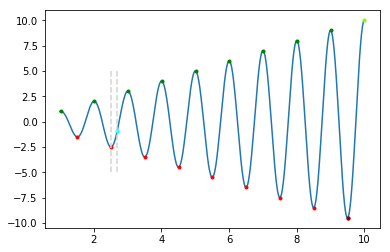

In [7]:
x = np.linspace(1,10,1000)
c1 = Curve(x,x*np.cos(2*np.pi*x))

lmax = c1.local_maxima() # local maxima
lmin = c1.local_minima() # local minima
gmax = c1.get_maximum() # global maximum
print(f'gmax: {gmax}')
gmin = c1.get_minimum() # global minimum
print(f'gmin: {gmin}')

gmax2 = c1.get_maximum(x_range=(2.5,2.7)) # global maximum between 2.5 and 2.7
print(f'gmax2: {gmax2}')

fig, ax = plt.subplots()
c1.plot(ax)
ax.plot(lmax,c1.evaluate(lmax),ls='',marker='.',color='green')
ax.plot(lmin,c1.evaluate(lmin),ls='',marker='.',color='red')
ax.plot(*gmax,ls='',marker='.',color='chartreuse')
ax.plot(*gmin,ls='',marker='.',color='darkred')
ax.plot(*gmax2,ls='',marker='.',color='cyan')
ax.plot((2.5,2.5),(-5,5),'--',color='lightgrey')
ax.plot((2.7,2.7),(-5,5),'--',color='lightgrey')
plt.show()

In [8]:
from ipywidgets import *
# global maximum in specified range
x = np.linspace(1,10,1000)
c1 = Curve(x,x*np.cos(2*np.pi*x))

def update(lower_limit = 1.0, upper_limit=5.0):
    fig= plt.figure(1)
    ax = fig.add_subplot(111)
    c1.plot(ax)
    pt, = ax.plot(*gmax2,ls='',marker='.',color='cyan')
    lline, = ax.plot((1,1),(-10,10),'--',color='lightgrey')
    uline, = ax.plot((1,1),(-10,10),'--',color='lightgrey')
    pt_max = c1.get_maximum(x_range=(lower_limit,upper_limit)) # specify the x range in which to look for the maximum
    lline.set_xdata((lower_limit,lower_limit))
    uline.set_xdata((upper_limit,upper_limit))
    pt.set_xdata(pt_max[0])
    pt.set_ydata(pt_max[1])
    fig.canvas.draw_idle()
    print(pt_max)

plot = interactive(update, lower_limit=(0,10,0.1),upper_limit=(0,10,0.1))
plot

interactive(children=(FloatSlider(value=1.0, description='lower_limit', max=10.0), FloatSlider(value=5.0, description='upper_limit', max=10.0), Output()), _dom_classes=('widget-interact',))

### Get the Envelope

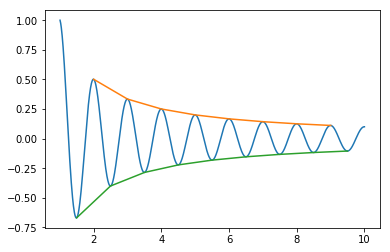

In [25]:
x = np.linspace(1,10,1000)
c1 = Curve(x,np.cos(2*np.pi*x)/x)
eu = c1.envelope()
el = c1.envelope(limit='lower')
fig, ax = plt.subplots()
c1.plot(ax)
eu.plot(ax)
el.plot(ax)
plt.show()

### Fit

[1.00673488 0.03601759]
[[ 0.00162747 -0.00895107]
 [-0.00895107  0.06265749]]


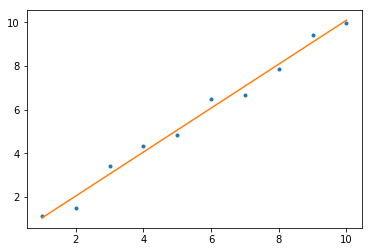

In [26]:
# basically the same as with scipy curve fit 
def lin(x,a,b):
        return a*x+b
x = np.linspace(1,10,10)
y = x + np.random.rand(10)-0.5
c1 = Curve(x,y)
popt,pcov = c1.fit(lin)
print(popt)
print(pcov)

cfit = Curve(x,lin(x,*popt)) # make a curve object out of the fit result

fig, ax = plt.subplots()
c1.plot(ax,plot_args={'marker':'.','ls':''})
cfit.plot(ax)
plt.show()

### FFT + IFFT

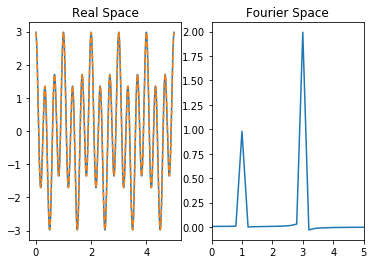

In [27]:
x = np.linspace(0,5,1000)
y = np.cos(2*np.pi*x+0.2)+2*np.cos(2*np.pi*3*x)
c = Curve(x,y)
fft = c.FFT()       # fast fourier transformation
ifft = fft.IFFT()   # inverse fast fourier transformation - takes into account the phase -> recovers the exact curve we started from

peaks = fft.local_maxima(x_precision=0.001)

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.set_title('Real Space')
ax2.set_title('Fourier Space')
c.plot(ax1)
fft.plot(ax2)
ax2.set_xlim(0,5)
ifft.plot(ax1,plot_args={'ls':'--'})
plt.show()

### Derivative

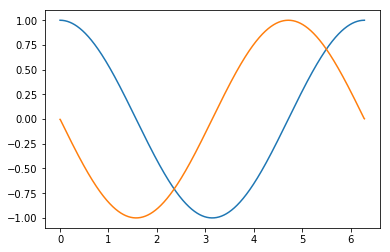

In [28]:
x = np.linspace(0,2*np.pi,1000)
y = np.cos(x)
c1 = Curve(x,y)
d1 = c1.derivative()
fig,ax = plt.subplots()
c1.plot(ax)
d1.plot(ax)
plt.show()

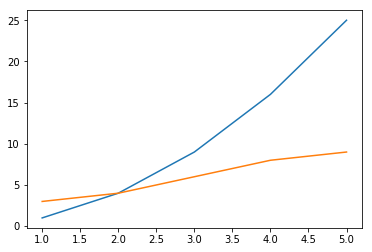

Values of derivative:
[[1. 3.]
 [2. 4.]
 [3. 6.]
 [4. 8.]
 [5. 9.]]


In [29]:
x = np.linspace(1,5,5)
c2 = Curve(x,x**2)
d2 = c2.derivative() # uses np.gradient
fig,ax = plt.subplots()
c2.plot(ax)
d2.plot(ax)
plt.show()
print(f'Values of derivative:\n{d2.get_xy()}')

Note that the value is calculated from the slopes on the two segments surrounding that point. -> for the first and last value this leads to a slightly wrong value

### Antiderivative and Integration
The antiderivative is calculated using trapezoidal integration

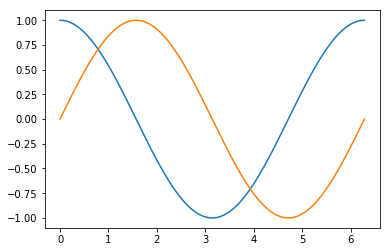

In [30]:
# antiderivative
x = np.linspace(0,2*np.pi,1000)
y = np.cos(x)
c1 = Curve(x,y)
ad1 = c1.antiderivative()
fig,ax = plt.subplots()
c1.plot(ax)
ad1.plot(ax)
plt.show()

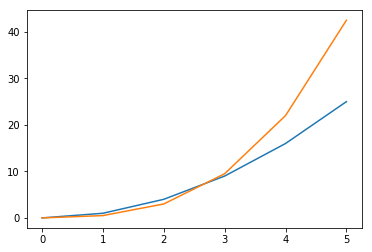

Values of antiderivative:
[[ 0.   0. ]
 [ 1.   0.5]
 [ 2.   3. ]
 [ 3.   9.5]
 [ 4.  22. ]
 [ 5.  42.5]]


In [31]:
x = np.linspace(0,5,6)
c2 = Curve(x,x**2)
ad2 = c2.antiderivative() 
fig,ax = plt.subplots()
c2.plot(ax)
ad2.plot(ax)
plt.show()
print(f'Values of antiderivative:\n{ad2.get_xy()}')

In [32]:
# integrate
c1.integrate() # integrate cos(x) from 0 to 2pi -> approx 0

2.809445158710196e-16

In [33]:
c1.integrate((0,np.pi/2)) # cos(x) from 0 to pi/2 -> 1

0.9999967035377821

In [34]:
c2.integrate((1,3)) # x**2 from 1 to 3 = 1/3 (3**3-1**3) = 26/3 approx 8.67

8.999999999999998

Numerical error due to low number of data points. Gets more precise when using more points:

In [35]:
x = np.linspace(1,10,1000)
c3 = Curve(x,x**2)
c3.integrate((1,3))

8.666693720747773

# File I/O
For now, two file I/O methods are supported. 
Human readable csv files and binary pickling.

## CSV


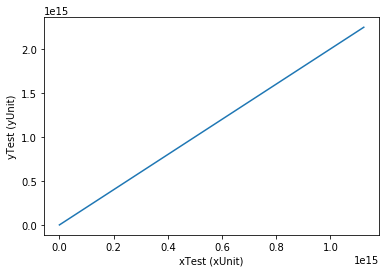

array([[1.2346e-01, 1.1235e+15],
       [2.4691e-01, 2.2469e+15]])

In [36]:
x = np.array([0.1234567,1.1234567e15])
c = Curve(x,2*x,x_label="xTest",x_unit="xUnit",y_label="yTest",y_unit="yUnit",plot_args={'color':'green'})
# using default arguments - scientific notation saving 5 significant digits 
c.save_to_csv("CSV-Test.csv")
c2 = Curve().load_from_csv('CSV-Test.csv')
c2.plot_standalone()
c2.get_x_y()

Note that the axis labels and units are restored, other information such as the plot properties are lost.
The default precision is 5 significant digits, this can be changed with the 'fmt' parameter. e.g. %.2e for 3 significants. Don't use a too high precision, this just wastes disk space.

## Pickle
Python's pickle module offers serialization of many objects.
This is used here to save the curve to a binary file. This saves not only the data but also all other properties, even variables defined by the user.
Recommended for saving intermediate results of some code that will be reused by another python code later on.

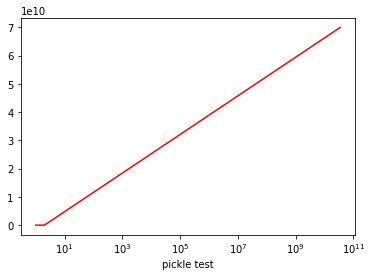

c2.random_userdefined_variable: 5


In [37]:
x = np.array([1,2,3.5e10])
c1 = Curve(x,x*2,x_label='pickle test',plot_args={'color':'red'},x_scale='log')
c1.random_userdefined_variable = 5 # add a user defined variable
c1.pickle_save('test-pickle.cur')
del c1
c2 = Curve().pickle_load('test-pickle.cur')
c2.plot_standalone()

print(f'c2.random_userdefined_variable: {c2.random_userdefined_variable}')
os.remove("test-pickle.cur")